###### 时间序列
* 时间戳（timestamp)
* 固定时期(period)
* 时间间隔(interval)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime  # datetime.datetime 使用最多的数据类型
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

#####  *datetime*模块中的数据类型
* date -以公历形式存储的年月日
* time -存储为时分秒毫秒
* datetime -存储日期和时间 --datetime = date + time
* timedelta -表示两个datetime值之间的差 -日秒毫秒

-----------------------------------------------------------------------
#### *datetime*格式定义
* %Y 4位数年    %y 2位数年
* %m 2位数月    %d 2位数日(一位也可以解析）
* %H 小时（24小时）  %I 小时（12小时）
* %M 2位数分钟      %S 秒\[00,61\](秒60，61用于闰秒)
* %w 整数表示星期几  %z 表示时区偏移
* %F %Y-%m-%d 缩写  %D  %m/%d/%Y 缩写
* %a 星期几英文缩写  %A 星期几英文全称
* %b 月份缩写       %B 月份全称  
* %c 完整的日期     %p 上午还是下午
* %x 适应当前环境的日期格式   %X 适应当前环境的时间格式


In [2]:
now = datetime.now()  # 以毫秒形式存储日期与时间
now

datetime.datetime(2017, 10, 1, 10, 40, 9, 925076)

In [4]:
now.year, now.month, now.day  # 居然返回一个元组

(2017, 10, 1)

In [6]:
delta = datetime.now() - datetime(1994,8,7,17,18)
delta  # datetime.timedelta是两个时间对象之间的时间差

datetime.timedelta(8455, 62740, 459248)

In [7]:
delta.days  # 注意前面是day,这里是days

8455

In [12]:
delta.seconds

62740

In [20]:
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12,1111)  # timedate是先日，再秒

datetime.datetime(2011, 1, 19, 0, 18, 31)

In [21]:
start - 2 * timedelta(12, 1111)

datetime.datetime(2010, 12, 13, 23, 22, 58)

#### 字符串与*datetime*的相互转换
* datetime转换格式用 -strftime('转换的格式')
* 字符串转换成datetime -strptime(str, '识别的格式')

In [22]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [24]:
stamp.strftime('%Y - %m - %d')  # 转换datetime的格式

'2011 - 01 - 03'

In [31]:
datetime.date(stamp)  # date和time只能分解datetime么？可怕

datetime.date(2011, 1, 3)

In [35]:
value = '2011-1-1'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 1, 0, 0)

In [36]:
datestr = ['7/12/2001', '9/9/2009']
[datetime.strptime(x, '%m/%d/%Y') for x in datestr]

[datetime.datetime(2001, 7, 12, 0, 0), datetime.datetime(2009, 9, 9, 0, 0)]

###### 日期自动解析 parse   from [dateutil.parser]()

In [37]:
# strptime可以对已知格式进行日期解析，但对于常见格式的自动解析，我们可以用parser.parse[dateutil]
from dateutil.parser import parse
parse('2001-12-12')

datetime.datetime(2001, 12, 12, 0, 0)

In [38]:
parse('Jan 31, 1994 10:45 PM')

datetime.datetime(1994, 1, 31, 22, 45)

In [39]:
# 国际通用格式中，日在月前面
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

In [40]:
# pandas 日期解析属性
pd.to_datetime(datestr)

DatetimeIndex(['2001-07-12', '2009-09-09'], dtype='datetime64[ns]', freq=None)

In [42]:
# 可以处理缺失值，表示为NaT
idx = pd.to_datetime(datestr + [None])
idx.isnull()

array([False, False,  True], dtype=bool)

In [45]:
atime = '8/3/2019'
datetime.strptime(atime, '%m/%d/%Y')

datetime.datetime(2019, 8, 3, 0, 0)

In [49]:
#### 时间序列基础
dates = ['2011-1-2','2011-1-5','2011-1-7','2011-1-8','2011-1-10','2011-1-12']
dates = [parse(x) for x in dates]
ts = Series(np.random.randn(6), index = dates)  # 创建带有DatetimeIndex的Series时，pandas会自动识别为时间序列
ts

2011-01-02    0.989737
2011-01-05    0.674702
2011-01-07    1.297222
2011-01-08    0.736680
2011-01-10   -1.273366
2011-01-12    0.476142
dtype: float64

In [51]:
type(ts)

pandas.core.series.Series

In [53]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [54]:
ts['1/12/2011']  # 可以直接传入可以解释为日期的字符串，可以传入字符串日期，datetime或Timestamp

0.4761419618188249

In [56]:
longer_ts = Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
longer_ts

2000-01-01    1.339675
2000-01-02    0.198076
2000-01-03   -0.636845
2000-01-04   -1.247412
2000-01-05   -0.294716
2000-01-06    1.019388
2000-01-07   -0.024852
2000-01-08    1.289348
2000-01-09    0.028459
2000-01-10    1.882496
2000-01-11    0.012879
2000-01-12    1.310761
2000-01-13    0.614686
2000-01-14    0.889261
2000-01-15    0.678966
2000-01-16    0.604645
2000-01-17   -0.853035
2000-01-18    0.563864
2000-01-19   -1.331722
2000-01-20    1.021454
2000-01-21    1.313393
2000-01-22   -0.544272
2000-01-23   -2.081838
2000-01-24   -1.321120
2000-01-25   -0.374013
2000-01-26   -0.609643
2000-01-27   -0.196468
2000-01-28   -1.309516
2000-01-29    0.844773
2000-01-30    1.048412
                ...   
2002-08-28    0.110186
2002-08-29   -0.407267
2002-08-30   -1.472597
2002-08-31    0.105392
2002-09-01    0.015085
2002-09-02    1.545620
2002-09-03   -0.198311
2002-09-04    0.660224
2002-09-05   -0.496625
2002-09-06    1.726385
2002-09-07   -1.141857
2002-09-08   -1.458707
2002-09-09 

In [57]:
longer_ts['2001']  # 提取年

2001-01-01   -0.274480
2001-01-02    1.156480
2001-01-03    2.213221
2001-01-04   -0.175111
2001-01-05   -0.412386
2001-01-06    0.342473
2001-01-07   -0.487882
2001-01-08   -1.306296
2001-01-09    0.509622
2001-01-10   -2.121143
2001-01-11    0.724492
2001-01-12   -0.404081
2001-01-13    0.590801
2001-01-14   -1.675487
2001-01-15    0.070764
2001-01-16    1.415568
2001-01-17    0.813249
2001-01-18    0.852707
2001-01-19   -1.005191
2001-01-20    0.493046
2001-01-21   -0.029629
2001-01-22    0.603874
2001-01-23    2.037486
2001-01-24   -1.665294
2001-01-25   -0.583354
2001-01-26   -0.106518
2001-01-27   -0.254788
2001-01-28   -0.521045
2001-01-29    0.914664
2001-01-30    0.799827
                ...   
2001-12-02    0.473654
2001-12-03   -0.977422
2001-12-04   -0.372821
2001-12-05   -0.756361
2001-12-06   -1.783225
2001-12-07   -0.692628
2001-12-08    0.526629
2001-12-09    0.085937
2001-12-10    0.104156
2001-12-11    0.650169
2001-12-12   -1.562575
2001-12-13   -0.824710
2001-12-14 

In [58]:
ts['1/3/2011':]  # 切片

2011-01-05    0.674702
2011-01-07    1.297222
2011-01-08    0.736680
2011-01-10   -1.273366
2011-01-12    0.476142
dtype: float64

In [59]:
# 另一种切片方式
ts.truncate(after = '1/9/2011')

2011-01-02    0.989737
2011-01-05    0.674702
2011-01-07    1.297222
2011-01-08    0.736680
dtype: float64

In [60]:
ts.truncate(before = '1/8/2011')

2011-01-08    0.736680
2011-01-10   -1.273366
2011-01-12    0.476142
dtype: float64

In [ ]:
# 对于带有重复索引的时间序列  groupby(level = 0)

In [61]:
# 生成日期范围
pd.date_range('4/1/2001','6/1/2001')  # 默认生成频率是日

DatetimeIndex(['2001-04-01', '2001-04-02', '2001-04-03', '2001-04-04',
               '2001-04-05', '2001-04-06', '2001-04-07', '2001-04-08',
               '2001-04-09', '2001-04-10', '2001-04-11', '2001-04-12',
               '2001-04-13', '2001-04-14', '2001-04-15', '2001-04-16',
               '2001-04-17', '2001-04-18', '2001-04-19', '2001-04-20',
               '2001-04-21', '2001-04-22', '2001-04-23', '2001-04-24',
               '2001-04-25', '2001-04-26', '2001-04-27', '2001-04-28',
               '2001-04-29', '2001-04-30', '2001-05-01', '2001-05-02',
               '2001-05-03', '2001-05-04', '2001-05-05', '2001-05-06',
               '2001-05-07', '2001-05-08', '2001-05-09', '2001-05-10',
               '2001-05-11', '2001-05-12', '2001-05-13', '2001-05-14',
               '2001-05-15', '2001-05-16', '2001-05-17', '2001-05-18',
               '2001-05-19', '2001-05-20', '2001-05-21', '2001-05-22',
               '2001-05-23', '2001-05-24', '2001-05-25', '2001-05-26',
      

In [62]:
pd.date_range(start = '4/1/2001', periods = 20)

DatetimeIndex(['2001-04-01', '2001-04-02', '2001-04-03', '2001-04-04',
               '2001-04-05', '2001-04-06', '2001-04-07', '2001-04-08',
               '2001-04-09', '2001-04-10', '2001-04-11', '2001-04-12',
               '2001-04-13', '2001-04-14', '2001-04-15', '2001-04-16',
               '2001-04-17', '2001-04-18', '2001-04-19', '2001-04-20'],
              dtype='datetime64[ns]', freq='D')

In [64]:
pd.date_range('4/1/2001','6/1/2001', freq = 'BM')

DatetimeIndex(['2001-04-30', '2001-05-31'], dtype='datetime64[ns]', freq='BM')

In [65]:
pd.date_range('5/12/2012 12:13:13', periods = 20, normalize = True)  # 规范化时间部分

DatetimeIndex(['2012-05-12', '2012-05-13', '2012-05-14', '2012-05-15',
               '2012-05-16', '2012-05-17', '2012-05-18', '2012-05-19',
               '2012-05-20', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-26', '2012-05-27',
               '2012-05-28', '2012-05-29', '2012-05-30', '2012-05-31'],
              dtype='datetime64[ns]', freq='D')

In [67]:
# 频率和偏移量
from pandas.tseries.offsets import Hour, Minute
Hour(10)

<10 * Hours>

In [68]:
# 可加和性
Hour(1) + Minute(30)

<90 * Minutes>

In [69]:
# date_range中freq参数的传入
pd.date_range('1/1/2000', periods = 10, freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

####  **时间频率**
    * D/B/H/T/S/L/U   日历日/工作日/小时/分/秒/毫秒/微秒
* M/BM/MS/BMS    每月最后一个日历日/工作日/第一个……
* W-MON/W-TUE    每月每周的星期几
* WOM-1MON/WOM-2TUE   # 每月每周的第几个星期几
* Q-JAN/BQ-JAN/QS-JANBQS-JAN   # 从几月开始的每季度最后一个日历日/工作日/第一个……
* A-JAN/BA-JAN/AS-JAN/BAS-JAN  # 从几月开始的没年度最后一个日历日/工作日/第一个……

In [3]:
ts = Series(np.random.randn(4),
           index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
ts

2000-01-31    1.033841
2000-02-29    2.199375
2000-03-31    0.309587
2000-04-30    0.345247
Freq: M, dtype: float64

In [4]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.033841
2000-04-30    2.199375
Freq: M, dtype: float64

In [5]:
ts.shift(-2)

2000-01-31    0.309587
2000-02-29    0.345247
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [6]:
ts/ts.shift(1)-1  # 百分比变化

2000-01-31         NaN
2000-02-29    1.127382
2000-03-31   -0.859239
2000-04-30    0.115186
Freq: M, dtype: float64

In [7]:
# 已知频率  ---单纯位移操作不会修改索引，导致部分数据丢失，这样会使时间戳移动而不是数据移动
ts.shift(2, freq = 'M')

2000-03-31    1.033841
2000-04-30    2.199375
2000-05-31    0.309587
2000-06-30    0.345247
Freq: M, dtype: float64

In [8]:
ts.shift(3, freq = "D")

2000-02-03    1.033841
2000-03-03    2.199375
2000-04-03    0.309587
2000-05-03    0.345247
dtype: float64

In [9]:
ts.shift(1, freq = '3D')

2000-02-03    1.033841
2000-03-03    2.199375
2000-04-03    0.309587
2000-05-03    0.345247
dtype: float64

In [10]:
ts.shift(1, freq = '90T')

2000-01-31 01:30:00    1.033841
2000-02-29 01:30:00    2.199375
2000-03-31 01:30:00    0.309587
2000-04-30 01:30:00    0.345247
Freq: M, dtype: float64

In [11]:
# 通过偏移量对日期进行位移
from pandas.tseries.offsets import Day, MonthEnd
now = datetime.now()
now + 3 * Day()

Timestamp('2017-10-04 17:34:04.005705')

In [12]:
# 锚点
now + MonthEnd()  # 默认是1

Timestamp('2017-10-31 17:34:04.005705')

In [13]:
now + MonthEnd(3)

Timestamp('2017-12-31 17:34:04.005705')

In [14]:
# 锚点还是可以向前，向后的
MonthEnd().rollforward(now)

Timestamp('2017-10-31 17:34:04.005705')

In [15]:
MonthEnd().rollback(now)

Timestamp('2017-09-30 17:34:04.005705')

In [16]:
ts = Series(np.random.randn(100), 
           index = pd.date_range('1/1/2017', periods = 100, freq = '4d'))
ts.groupby(MonthEnd()).mean()

2017-01-31   -0.502682
2017-02-28   -0.427030
2017-03-31    0.000239
2017-04-30   -0.261614
2017-05-31   -0.012147
2017-06-30   -0.143833
2017-07-31   -0.274517
2017-08-31    0.022813
2017-09-30    0.630197
2017-10-31    0.363602
2017-11-30   -0.784564
2017-12-31   -0.557156
2018-01-31   -0.229036
2018-02-28    0.966408
dtype: float64

In [17]:
# More gentle .......
ts.resample('M').mean()

2017-01-31   -0.502682
2017-02-28   -0.427030
2017-03-31    0.000239
2017-04-30   -0.261614
2017-05-31   -0.012147
2017-06-30   -0.104162
2017-07-31   -0.338525
2017-08-31    0.022813
2017-09-30    0.592281
2017-10-31    0.368850
2017-11-30   -0.784564
2017-12-31   -0.576830
2018-01-31   -0.159677
2018-02-28    0.966408
Freq: M, dtype: float64

In [18]:
# 时区
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [19]:
pytz.timezone('US/Eastern')  # 获取时区对象

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [20]:
# 本地化和转换
rng = pd.date_range('4/1/2017 16:00', periods = 6, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2017-04-01 16:00:00    1.012902
2017-04-02 16:00:00   -2.344639
2017-04-03 16:00:00    0.094559
2017-04-04 16:00:00    0.414983
2017-04-05 16:00:00   -0.284562
2017-04-06 16:00:00   -0.019973
Freq: D, dtype: float64

In [21]:
pd.date_range('4/1/2017 16:00', periods = 6, freq = 'D', tz = 'UTC')

DatetimeIndex(['2017-04-01 16:00:00+00:00', '2017-04-02 16:00:00+00:00',
               '2017-04-03 16:00:00+00:00', '2017-04-04 16:00:00+00:00',
               '2017-04-05 16:00:00+00:00', '2017-04-06 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [24]:
ts_utc = ts.tz_localize('UTC')  # 时间从naive到本地化
ts_utc

2017-04-01 16:00:00+00:00    1.012902
2017-04-02 16:00:00+00:00   -2.344639
2017-04-03 16:00:00+00:00    0.094559
2017-04-04 16:00:00+00:00    0.414983
2017-04-05 16:00:00+00:00   -0.284562
2017-04-06 16:00:00+00:00   -0.019973
Freq: D, dtype: float64

In [25]:
ts_utc.index

DatetimeIndex(['2017-04-01 16:00:00+00:00', '2017-04-02 16:00:00+00:00',
               '2017-04-03 16:00:00+00:00', '2017-04-04 16:00:00+00:00',
               '2017-04-05 16:00:00+00:00', '2017-04-06 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [26]:
# 转换时区
ts_utc.tz_convert('US/Eastern')  # 从本地时间转为美东时间

2017-04-01 12:00:00-04:00    1.012902
2017-04-02 12:00:00-04:00   -2.344639
2017-04-03 12:00:00-04:00    0.094559
2017-04-04 12:00:00-04:00    0.414983
2017-04-05 12:00:00-04:00   -0.284562
2017-04-06 12:00:00-04:00   -0.019973
Freq: D, dtype: float64

In [27]:
atime = parse('10/01/2017 16:14')
atime

datetime.datetime(2017, 10, 1, 16, 14)

In [28]:
btime = datetime(2017,10,1,16,14)
btime

datetime.datetime(2017, 10, 1, 16, 14)

In [29]:
ctime = datetime.strptime('10/01/2017 16:14', '%m/%d/%Y %H:%M')
ctime

datetime.datetime(2017, 10, 1, 16, 14)

#### Period
表示时间区间，其构造函数需要用到一个字符串或整数和频率

In [30]:
p = pd.Period(2007, freq = 'A-DEC')  # 这个周期年以12月为最后一个月
p

Period('2007', 'A-DEC')

In [31]:
p+5

Period('2012', 'A-DEC')

In [32]:
pd.Period('2014', freq = 'A-DEC') - p

7

In [33]:
# PeriodIndex类保存一组Period,可以在任何pandas数据结构中被用作轴索引
Series(np.random.randn(6),index = rng)

2017-04-01 16:00:00   -1.422871
2017-04-02 16:00:00   -0.420318
2017-04-03 16:00:00   -1.485736
2017-04-04 16:00:00   -1.497050
2017-04-05 16:00:00    0.703967
2017-04-06 16:00:00    0.881952
Freq: D, dtype: float64

In [34]:
# PeriodIndex类的构造函数还允许直接使用一组字符串
values = ['2001Q1','2002Q2','2003Q3']
index = pd.PeriodIndex(values,freq = 'Q-DEC')
index

PeriodIndex(['2001Q1', '2002Q2', '2003Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [35]:
# 频率转换
p = pd.Period('2007', freq = 'A-DEC')
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [36]:
# timestamp转换成Periods
rng = pd.date_range('1/1/2000', periods = 3, freq = 'M')
ts = Series(np.random.randn(3), index = rng)
ts

2000-01-31   -0.016738
2000-02-29   -1.003040
2000-03-31   -0.606121
Freq: M, dtype: float64

In [37]:
pts = ts.to_period()
pts

2000-01   -0.016738
2000-02   -1.003040
2000-03   -0.606121
Freq: M, dtype: float64

In [38]:
# period 转换成timestamp
pts.to_timestamp(how = 'end')

2000-01-31   -0.016738
2000-02-29   -1.003040
2000-03-31   -0.606121
Freq: M, dtype: float64

#### 重采样及频率转换
*resampling*是将时间序列从一个频率转换到另一个频率的处理过程。
* 将从高频率到低频率是 *downsampling*
* 将从低频率到高频率是 *upsampling*

In [39]:
# pandas对象自带resample方法，是各种频率转换工作的主力函数
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)
ts.resample('M').mean()

2000-01-31    0.142336
2000-02-29    0.021902
2000-03-31    0.032181
2000-04-30    0.331051
Freq: M, dtype: float64

In [41]:
ts.resample('M', kind = 'period').mean()  # 你看瞬间转成period

2000-01    0.142336
2000-02    0.021902
2000-03    0.032181
2000-04    0.331051
Freq: M, dtype: float64

#### 降采样
**需要聚合**<br>
降采样 --面元  ---类似集合的概念
* 各区间哪边是闭合的
* 如何标记聚合面元，用区间的开头还是末尾

In [42]:
rng = pd.date_range('1/1/2000', periods = 12, freq = 'T')
ts = Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [43]:
ts.resample('5T').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [46]:
ts.resample('5T', closed = 'left', label = 'left').sum()  # 区间那一段闭合，区间标签用哪头？

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [48]:
ts.resample('5T', loffset = '-1s').sum()   # 偏移更清楚

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

In [49]:
# OHLC重抽样
ts.resample('5T').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [50]:
# 通过groupby重抽样
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = Series(np.arange(100), index = rng)
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [51]:
ts.groupby(lambda x:x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

##### 升采样和插值
**不需要聚合，但需要插值**

In [52]:
frame = DataFrame(np.random.randn(2, 4),
                 index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                 columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,0.828929,0.778612,1.016067,-0.104930
2000-01-12,-1.580543,-1.299263,0.500761,0.901632


In [56]:
frame.resample('D').ffill()  # 向前填充

,Colorado,Texas,New York,Ohio
2000-01-05,0.828929,0.778612,1.016067,-0.104930
2000-01-06,0.828929,0.778612,1.016067,-0.104930
2000-01-07,0.828929,0.778612,1.016067,-0.104930
2000-01-08,0.828929,0.778612,1.016067,-0.104930
2000-01-09,0.828929,0.778612,1.016067,-0.104930
2000-01-10,0.828929,0.778612,1.016067,-0.104930
2000-01-11,0.828929,0.778612,1.016067,-0.104930
2000-01-12,-1.580543,-1.299263,0.500761,0.901632


In [57]:
frame.resample('D').bfill()  # 向后填充

,Colorado,Texas,New York,Ohio
2000-01-05,0.828929,0.778612,1.016067,-0.104930
2000-01-06,-1.580543,-1.299263,0.500761,0.901632
2000-01-07,-1.580543,-1.299263,0.500761,0.901632
2000-01-08,-1.580543,-1.299263,0.500761,0.901632
2000-01-09,-1.580543,-1.299263,0.500761,0.901632
2000-01-10,-1.580543,-1.299263,0.500761,0.901632
2000-01-11,-1.580543,-1.299263,0.500761,0.901632
2000-01-12,-1.580543,-1.299263,0.500761,0.901632


In [61]:
frame.resample('D').ffill(2)  # limit = 2

,Colorado,Texas,New York,Ohio
2000-01-05,0.828929,0.778612,1.016067,-0.104930
2000-01-06,0.828929,0.778612,1.016067,-0.104930
2000-01-07,0.828929,0.778612,1.016067,-0.104930
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.580543,-1.299263,0.500761,0.901632


In [69]:
frame = DataFrame(np.random.randn(24, 4),
                 index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                 columns = ['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.245695,0.076092,0.072685,-0.631415
2000-02,-1.925340,-0.929974,-0.959440,-1.667552
2000-03,0.786333,0.200772,0.230920,0.806143
2000-04,-0.649397,0.729617,-1.219244,-1.870290
2000-05,0.168216,0.929347,2.625855,-0.923856


In [71]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.396596,0.006095,0.053935,-0.164844
2001,0.035106,-0.088437,-0.096854,-0.114813


In [73]:
annual_frame.resample('Q-DEC', convention = 'start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.396596,0.006095,0.053935,-0.164844
2000Q2,-0.396596,0.006095,0.053935,-0.164844
2000Q3,-0.396596,0.006095,0.053935,-0.164844
2000Q4,-0.396596,0.006095,0.053935,-0.164844
2001Q1,0.035106,-0.088437,-0.096854,-0.114813
2001Q2,0.035106,-0.088437,-0.096854,-0.114813
2001Q3,0.035106,-0.088437,-0.096854,-0.114813
2001Q4,0.035106,-0.088437,-0.096854,-0.114813


#### 时间序列绘图

In [75]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates = True, index_col = 0)
close_px =  close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [77]:
% matplotlib inline

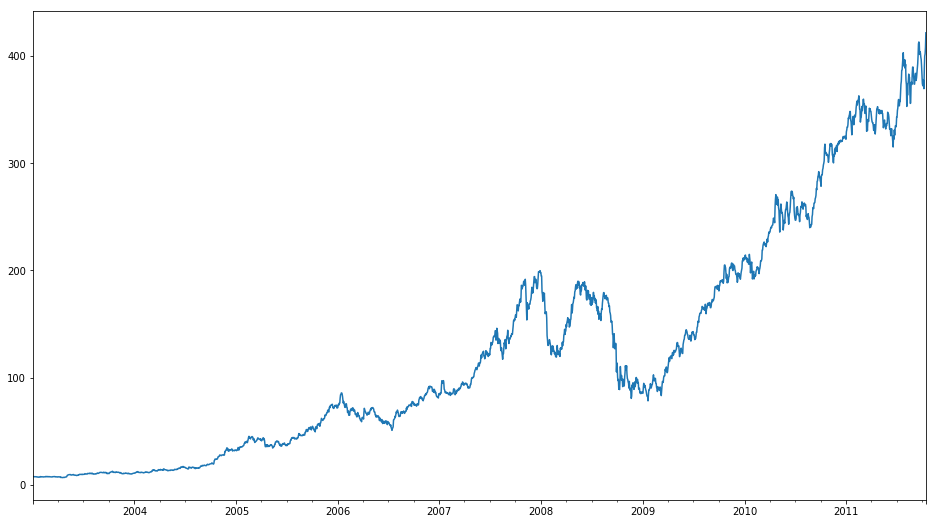

In [79]:
close_px['AAPL'].plot(figsize = (16,9))

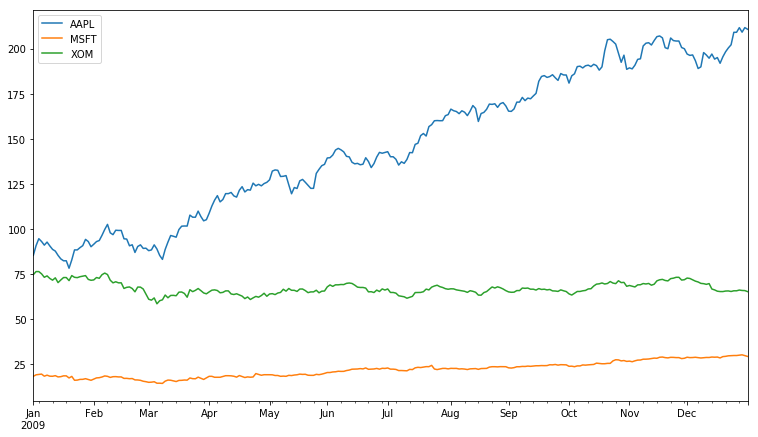

In [84]:
close_px.loc['2009'].plot(figsize = (16 * 0.8, 9 * 0.8))

#### 移动窗口函数
在移动窗口上计算的各种统计函数是一种常见的时间序列数组变换 --moving window function 包括窗口不定长的函数，自动排除缺失值

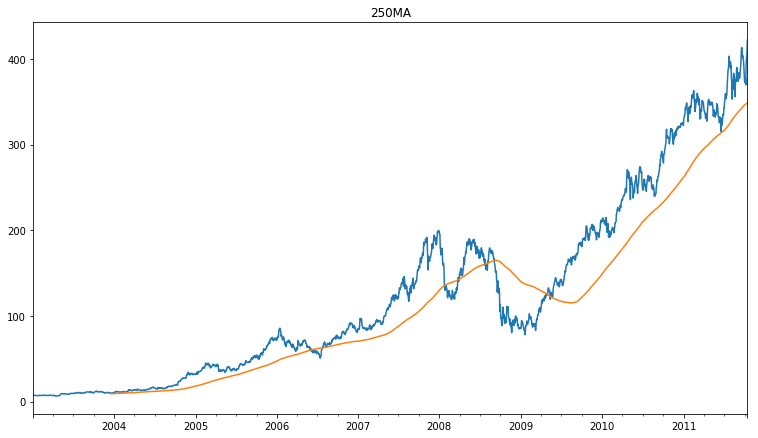

In [102]:
#  rolling_mean 移动平均  可以加apply
import matplotlib.pyplot as plt
_ = close_px.AAPL.plot()
_ = close_px.AAPL.rolling(250).mean().plot(figsize = (12.8, 7.2))
_ = plt.title('250MA')

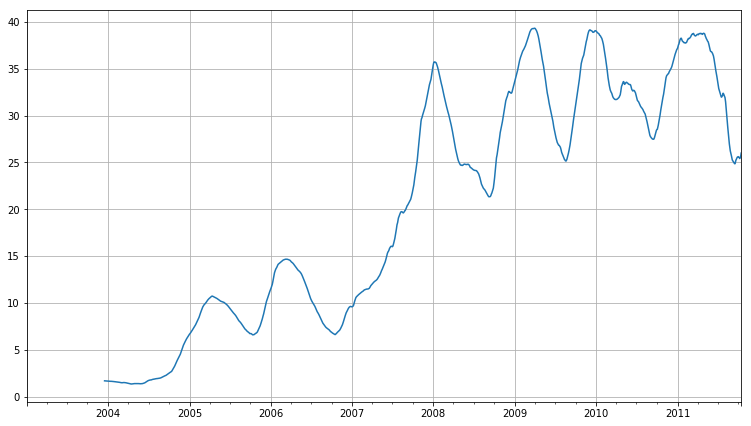

In [104]:
_ = close_px.AAPL.rolling(250).std().plot(figsize = (12.8, 7.2), grid = True)

#### 指数加权函数
衰减因子常量--span:使结果兼容于窗口大小等于时间间隔的简单移动窗口函数

AttributeError: 'EWM' object has no attribute 'plot'

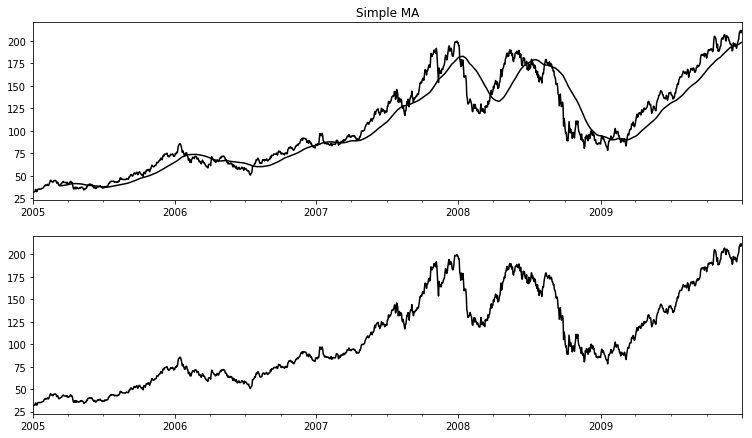

In [109]:
fig, axes = plt.subplots(2, 1, figsize = (12.7, 7.2))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(60, min_periods = 50).mean()
ewma60 = aapl_px.ewm(span = 60)
aapl_px.plot(style = 'k-', ax = axes[0])
ma60.plot(style = 'k-', ax =axes[0])
axes[0].set_title('Simple MA')
aapl_px.plot(style = 'k-', ax = axes[1])
ewma60.plot(style = 'k--', ax =axes[1])
axes[1].set_title('Exponentially-weighted MA')

#### 二元移动窗口函数
还可以自定义窗口长度
#### 自定义的移动窗口函数
apply--要求返回单个值

In [110]:
# 性能方面
rng = pd.date_range('1/1/2000', periods = 100000000, freq = '10ms')
ts = Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01 00:00:00.000    0.521862
2000-01-01 00:00:00.010    0.655991
2000-01-01 00:00:00.020    1.200900
2000-01-01 00:00:00.030    1.158765
2000-01-01 00:00:00.040    0.598483
2000-01-01 00:00:00.050    1.551031
2000-01-01 00:00:00.060   -1.119567
2000-01-01 00:00:00.070    2.170957
2000-01-01 00:00:00.080    0.274672
2000-01-01 00:00:00.090    1.122602
2000-01-01 00:00:00.100    1.908691
2000-01-01 00:00:00.110    0.114451
2000-01-01 00:00:00.120    0.738278
2000-01-01 00:00:00.130    0.163947
2000-01-01 00:00:00.140    1.344852
2000-01-01 00:00:00.150   -2.014226
2000-01-01 00:00:00.160    0.602333
2000-01-01 00:00:00.170    1.708918
2000-01-01 00:00:00.180   -2.312344
2000-01-01 00:00:00.190   -0.009141
2000-01-01 00:00:00.200   -0.104276
2000-01-01 00:00:00.210    0.944458
2000-01-01 00:00:00.220   -0.489004
2000-01-01 00:00:00.230   -0.426731
2000-01-01 00:00:00.240   -1.115151
2000-01-01 00:00:00.250   -0.551846
2000-01-01 00:00:00.260   -0.484649
2000-01-01 00:00:00.270   -0

In [111]:
ts.resample('15min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0.521862,4.874140,-4.345223,0.112908
2000-01-01 00:15:00,-0.402644,4.077807,-4.598769,-1.029565
2000-01-01 00:30:00,0.109775,4.360127,-4.528065,-0.431630
2000-01-01 00:45:00,0.647589,4.493408,-4.724972,-0.802850
2000-01-01 01:00:00,-0.143158,4.151550,-4.317555,0.349739
2000-01-01 01:15:00,0.731601,4.421986,-4.558735,-1.441001
2000-01-01 01:30:00,0.952385,4.230951,-4.357028,-0.273095
2000-01-01 01:45:00,0.855381,4.689757,-4.760330,-0.302331
2000-01-01 02:00:00,-1.274718,4.264824,-4.804831,0.497784
2000-01-01 02:15:00,1.578042,4.797492,-3.946217,-1.557075


In [112]:
% timeit ts.resample('15T').ohlc()

1.58 s ± 46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 金融和经济数据应用

In [96]:
adata = pd.read_csv('volume.csv')
bdata = pd.read_csv('px.csv')
adata[:10]

,Unnamed: 0,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,1990-02-01 00:00:00,2185600.0,4193200.0,14457600.0,6903600.0,5942400.0,89193600.0,2954400.0,154580000.0,2916400.0
1,1990-02-02 00:00:00,3103200.0,4248800.0,15302400.0,6064400.0,4732800.0,71395200.0,2424000.0,164400000.0,4250000.0
2,1990-02-05 00:00:00,1792800.0,3653200.0,9134400.0,5299200.0,3950400.0,59731200.0,2225400.0,130950000.0,5880800.0
3,1990-02-06 00:00:00,2205600.0,2640000.0,14389200.0,10808000.0,3761600.0,81964800.0,3270000.0,134070000.0,4750800.0
4,1990-02-07 00:00:00,3592800.0,11180800.0,18704400.0,12057600.0,5458400.0,134150400.0,4332600.0,186710000.0,4124800.0
5,1990-02-08 00:00:00,2777600.0,6680000.0,16513200.0,7932000.0,8669600.0,95225600.0,5133000.0,176240000.0,5651200.0
6,1990-02-09 00:00:00,1582400.0,6004400.0,13785600.0,5061600.0,3277600.0,62380800.0,2628600.0,146910000.0,3384800.0
7,1990-02-12 00:00:00,2137600.0,2695600.0,15488400.0,4766400.0,2564800.0,56086400.0,1996200.0,118390000.0,2698000.0
8,1990-02-13 00:00:00,5026400.0,3653600.0,20540400.0,7168400.0,3635200.0,58752000.0,4217400.0,144490000.0,3564800.0
9,1990-02-14 00:00:00,2588800.0,3448000.0,10269600.0,6006800.0,3706400.0,35868800.0,2660400.0,138530000.0,2830000.0


In [3]:
bdata[:10]

,Unnamed: 0,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,1990-02-01 00:00:00,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1,1990-02-02 00:00:00,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
2,1990-02-05 00:00:00,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
3,1990-02-06 00:00:00,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
4,1990-02-07 00:00:00,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33
5,1990-02-08 00:00:00,5.04,7.71,2.92,17.86,4.46,0.51,6.22,332.96,6.35
6,1990-02-09 00:00:00,5.06,8.00,2.94,17.82,4.49,0.52,6.24,333.62,6.37
7,1990-02-12 00:00:00,4.96,7.94,2.89,17.58,4.46,0.52,6.23,330.08,6.22
8,1990-02-13 00:00:00,4.91,8.06,2.88,17.95,4.43,0.52,6.09,331.02,6.23
9,1990-02-14 00:00:00,4.94,8.00,2.89,18.04,4.47,0.52,6.10,332.01,6.20


In [103]:
adata1 = DataFrame(adata[['AAPL','JNJ','SPX','XOM']]).set_index(adata['Unnamed: 0'])
adata1.index = pd.DatetimeIndex(list(map(lambda x:parse(x), adata1.index)))
prices = adata1.loc['9/6/2011':'9/14/2011']

In [104]:
bdata1 = DataFrame(bdata[['AAPL','JNJ','XOM']]).set_index(bdata['Unnamed: 0'])
bdata1.index = pd.DatetimeIndex(list(map(lambda x:parse(x), bdata1.index)))
volume = bdata1.loc['9/6/2011':'9/14/2011']

```python
close_px = pd.read_csv('ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('ch11/volume.csv', parse_dates=True, index_col=0)
```

In [105]:
# 数据自动对齐
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,6.051726e+09,7.375770e+08,NaN,1.635440e+09
2011-09-14,7.429635e+09,8.558620e+08,NaN,1.891749e+09


In [107]:
vwap = (prices * volume).sum()/volume.sum()
vwap

AAPL    1.673577e+07
JNJ     1.394498e+07
SPX              NaN
XOM     2.484330e+07
dtype: float64

In [108]:
vwap.dropna()

AAPL    1.673577e+07
JNJ     1.394498e+07
XOM     2.484330e+07
dtype: float64

In [109]:
# 手工对齐
prices.align(volume, join = 'inner')

(                  AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0
 2011-09-13  15734300.0  11595300.0  22825400.0
 2011-09-14  19084600.0  13429500.0  26042800.0,
               AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84
 2011-09-13  384.62  63.61  71.65
 2011-09-14  389.30  63.73  72.64)

#### 频率不同的时间序列运算
频率转化和重对齐两大工具： **resample** 
**reindex**  
* *resample*用于将数据转换到固定频率
* *reindex*用于使数据符合一个新的索引

In [112]:
ts1 = Series(np.random.randn(3), index = pd.date_range('6/13/2012', periods = 3, freq = 'W-WED'))
ts1

2012-06-13   -0.959264
2012-06-20   -0.651589
2012-06-27    0.071704
Freq: W-WED, dtype: float64

In [113]:
ts1.resample('B').ffill()

2012-06-13   -0.959264
2012-06-14   -0.959264
2012-06-15   -0.959264
2012-06-18   -0.959264
2012-06-19   -0.959264
2012-06-20   -0.651589
2012-06-21   -0.651589
2012-06-22   -0.651589
2012-06-25   -0.651589
2012-06-26   -0.651589
2012-06-27    0.071704
Freq: B, dtype: float64

In [114]:
ts2 = Series(np.random.randn(6), index = pd.DatetimeIndex(['2012-6-12','2012-6-17','2012-6-18',
                                                          '2012-6-21','2012-6-22','2012-6-29']))
ts2

2012-06-12   -0.209946
2012-06-17    1.009315
2012-06-18   -1.228488
2012-06-21    1.088245
2012-06-22   -1.103669
2012-06-29   -2.051316
dtype: float64

In [119]:
ts1 = ts1.resample('B').ffill()

In [120]:
ts1.reindex(ts2.index).ffill() + ts2  # 用一个适应另一个

2012-06-12         NaN
2012-06-17         NaN
2012-06-18   -2.187752
2012-06-21    0.436656
2012-06-22   -1.755259
2012-06-29   -2.702906
dtype: float64

In [121]:
# 使用Period 切换频率asfreq
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [122]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [124]:
infl_q = infl.asfreq('Q-SEP',how = 'end')  # asfreq是切换频率
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [125]:
infl_q.reindex(gdp.index).ffill()

1984Q2      NaN
1984Q3      NaN
1984Q4      NaN
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

In [126]:
# 如果数据没有恰好落在时间点上 --我们取个区间嘛
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [127]:
from datetime import time
ts[time(10, 0)]  # 恰好落在10点的数据

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [128]:
# 实际情况
ts.at_time(time(10,0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [129]:
ts.between_time(time(10,0),time(10,1))  # 10点整到10点一分

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

#### 拼接数据源
* 从特定时刻切换数据源
* 对序列缺失值打补丁
* 将数据中的符号替换成实际数据

In [133]:
# 1 切换
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [134]:
# 2 补丁
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [136]:
spliced_filled = spliced.combine_first(data2)
spliced_filled  # 空缺值因为data2里也没有

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [138]:
# dataframe里的方法
spliced.update(data2, overwrite = False)
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [139]:
# 3 替换
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


In [142]:
# 收益率
from pandas_datareader import wb
price = web.get_data_yahoo('AAPL','2011-01-01')['Adj Close']
price[-5:]

ImportError: No module named 'pandas_datareader'

In [ ]:
# 简单计算
price['2011-10-03'] / price['2011-3-01'] - 1

In [ ]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

In [ ]:
m_returns = ret_index.resample('BM', how='last').pct_change()
m_returns['2012']

In [ ]:
m_rets = (1 + returns).resample('M', how='prod', kind='period') - 1
m_rets['2012']

In [ ]:
returns[dividend_dates] += dividend_pcts  # 已知股息派发日和支付率

#### 因子分析与分位数分析